# Random directions

This notebook generates random total-magnetization directions for a model.

In [12]:
import numpy as np
import os
import mplstereonet as msn
import matplotlib.pyplot as plt
import cPickle as pickle

from fatiando.utils import ang2vec

# Defining random directions

In [13]:
model_dir = 'data/model.pickle'

In [14]:
with open(model_dir) as w:
        model = pickle.load(w)

In [119]:
# magnetization direction
incs = model['inc']
decs = model['dec']

num = 15
d = 30.
s = 2.

incs_rd = incs + np.random.uniform(-d, d, num)
decs_rd = decs + np.random.uniform(-d, d, num)

In [120]:
mypath = 'data/flightlines_grid_2100pts_100k/both_inversion/num%d_d%d/' % (num, d)
if not os.path.isdir(mypath):
   os.makedirs(mypath)

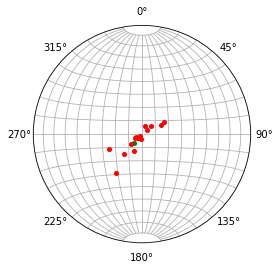

In [121]:
fig, ax = msn.subplots()

ax.pole(incs, decs, markersize=4, color='g')
ax.pole(incs_rd, decs_rd, markersize=4, color='red')
ax.grid(True)

plt.savefig(mypath+'stereo.png', dpi=300, bbox_inches="tight")

plt.show()

In [122]:
incs_rd

array([-44.65148661, -30.08637663, -56.47833753, -44.02790566,
       -24.36115542, -24.70462044, -79.94079164, -63.445688  ,
       -41.2636409 , -51.70553963, -32.64572775, -26.91425631,
       -47.10506572, -71.01525988, -36.77438701])

In [123]:
decs_rd

array([  4.23763174, -18.73817187,  35.36579545,  11.03517165,
        26.85541898, -15.86522998,   3.46549706,  13.82084753,
        -8.93889621,   2.13566013,   6.03505204,   4.70901183,
        19.87760519,  -6.40319524,  -5.12404423])

In [124]:
random = dict()

In [125]:
random['directions'] = [incs_rd, decs_rd]
random['num'] = num
random['d'] = d

In [126]:
with open(mypath+'directions.pickle', 'w') as f:
    pickle.dump(random, f)